# Урок 1. Основы обучения нейронных сетей
# Практическое задание.

# Данные

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('13_1_Iris.csv')

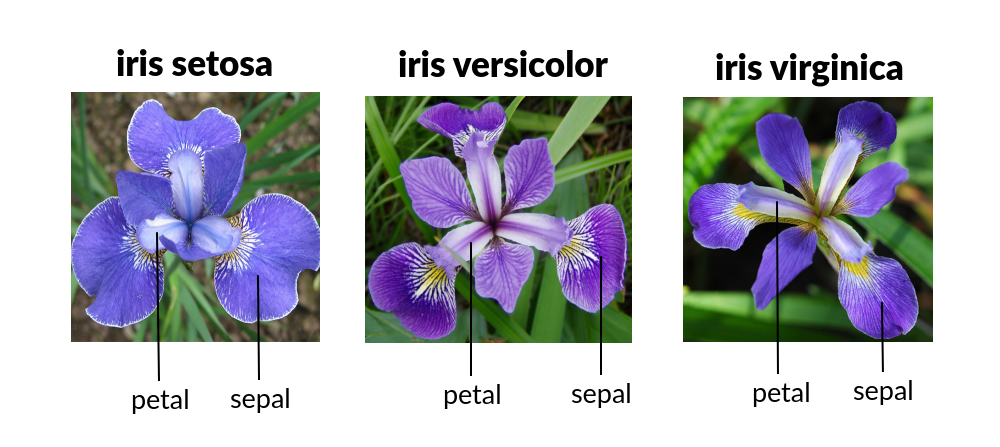

чашелистик и лепесток

In [3]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].to_numpy()

In [5]:
data.shape

(150, 4)

In [6]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Двуслойная нейронная сеть

In [7]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [8]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

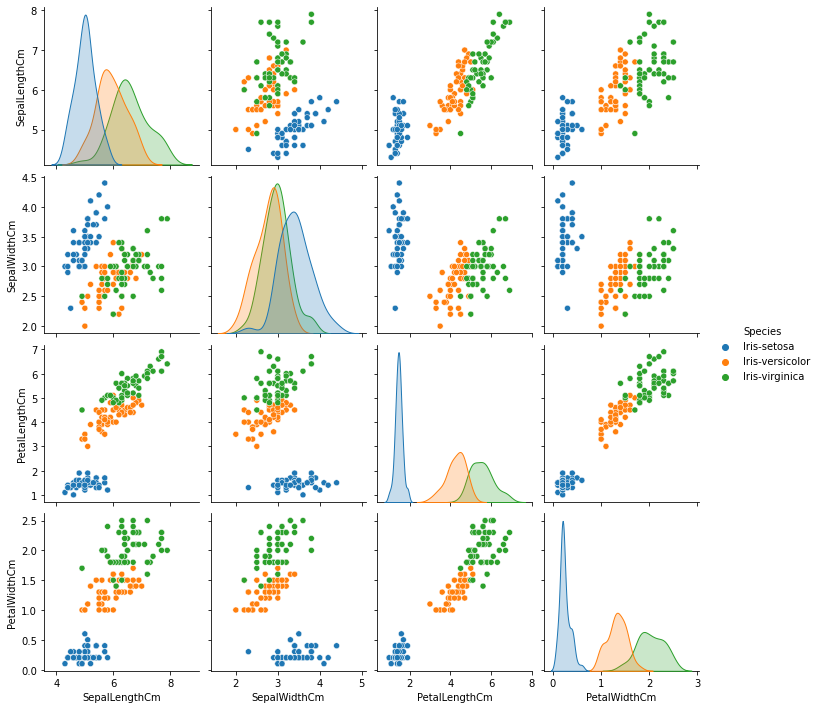

In [9]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("13_1_Iris.csv")

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.to_numpy())

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.to_numpy()
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
   

In [10]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0

In [11]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

## Домашнее задание.

Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким
образом, чтобы улучшить её точность. Проведите анализ — что приводит к ухудшению точности
нейронной сети? Что приводит к увеличению её точности?

##### Поменяем количество внутренних слоёв - 2, 3, 5, 7:

Точность нейронной сети 87.38%
Величина ошибки:
0.12624847272789125

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

Multilabel confusion matrix:

[[[31  0]
  [ 0 19]]

 [[33  1]
  [ 1 15]]

 [[34  1]
  [ 1 14]]]


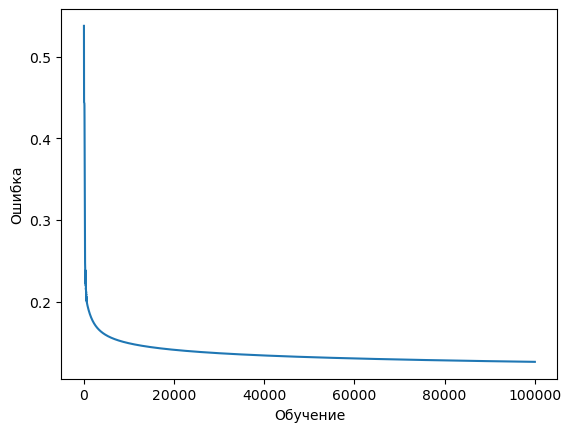

In [12]:
### 2 слоя
### Шаг 3. Обученние нейронной сети
# присваивание случайных весов
w0 = 2*np.random.random((4, 2)) - 1 # для входного слоя   - 4 входа, 2 выхода
w1 = 2*np.random.random((2, 3)) - 1 # для внутреннего слоя - 2 входа, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(np.dot(layer1, w1))
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(np.dot(layer0, w0))
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
    
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

print("Величина ошибки:")
print(errors[-1])

layer1 = sigmoid(np.dot(X_test, w0))
pred = sigmoid(np.dot(layer1, w1))
print()
print("Classification report:")
print()
print(classification_report(y_test.argmax(-1), pred.argmax(-1)))
print("Multilabel confusion matrix:")
print()
print(multilabel_confusion_matrix(y_test.argmax(-1), pred.argmax(-1)))

Точность нейронной сети 98.88%
Величина ошибки:
0.011200403977551045

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Multilabel confusion matrix:

[[[31  0]
  [ 0 19]]

 [[34  0]
  [ 1 15]]

 [[34  1]
  [ 0 15]]]


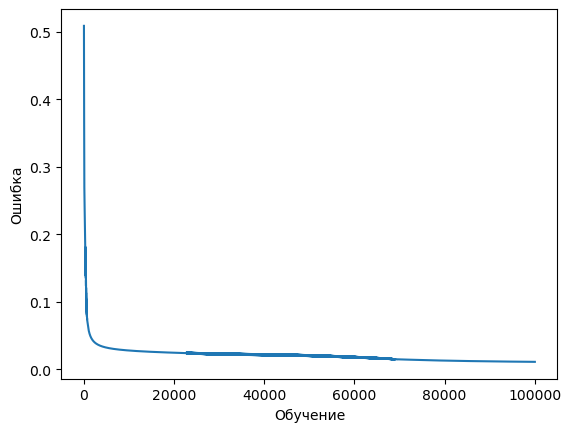

In [13]:
### 3 слоя
### Шаг 3. Обученние нейронной сети
# присваивание случайных весов
w0 = 2*np.random.random((4, 3)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((3, 3)) - 1 # для внутреннего слоя - 3 входа, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(np.dot(layer1, w1))
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(np.dot(layer0, w0))
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
    
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

print("Величина ошибки:")
print(errors[-1])

layer1 = sigmoid(np.dot(X_test, w0))
pred = sigmoid(np.dot(layer1, w1))
print()
print("Classification report:")
print()
print(classification_report(y_test.argmax(-1), pred.argmax(-1)))
print("Multilabel confusion matrix:")
print()
print(multilabel_confusion_matrix(y_test.argmax(-1), pred.argmax(-1)))

Точность нейронной сети 98.17%
Величина ошибки:
0.018263449534577324

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.81      0.90        16
           2       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50

Multilabel confusion matrix:

[[[31  0]
  [ 0 19]]

 [[34  0]
  [ 3 13]]

 [[32  3]
  [ 0 15]]]


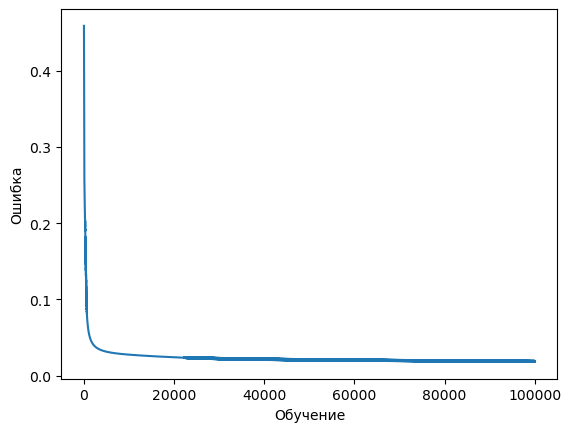

In [14]:
### 5 слоёв
### Шаг 3. Обученние нейронной сети
# присваивание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 5 выходов
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(np.dot(layer1, w1))
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(np.dot(layer0, w0))
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
    
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

print("Величина ошибки:")
print(errors[-1])

layer1 = sigmoid(np.dot(X_test, w0))
pred = sigmoid(np.dot(layer1, w1))
print()
print("Classification report:")
print()
print(classification_report(y_test.argmax(-1), pred.argmax(-1)))
print("Multilabel confusion matrix:")
print()
print(multilabel_confusion_matrix(y_test.argmax(-1), pred.argmax(-1)))

Точность нейронной сети 98.8%
Величина ошибки:
0.011998666996803428

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Multilabel confusion matrix:

[[[31  0]
  [ 0 19]]

 [[34  0]
  [ 0 16]]

 [[35  0]
  [ 0 15]]]


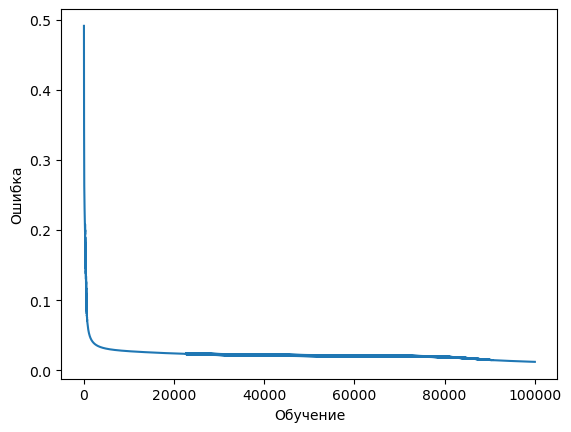

In [15]:
### 7 слоёв
### Шаг 3. Обученние нейронной сети
# присваивание случайных весов
w0 = 2*np.random.random((4, 7)) - 1 # для входного слоя   - 4 входа, 7 выходов
w1 = 2*np.random.random((7, 3)) - 1 # для внутреннего слоя - 7 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(np.dot(layer1, w1))
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(np.dot(layer0, w0))
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
    
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

print("Величина ошибки:")
print(errors[-1])

layer1 = sigmoid(np.dot(X_test, w0))
pred = sigmoid(np.dot(layer1, w1))
print()
print("Classification report:")
print()
print(classification_report(y_test.argmax(-1), pred.argmax(-1)))
print("Multilabel confusion matrix:")
print()
print(multilabel_confusion_matrix(y_test.argmax(-1), pred.argmax(-1)))

Точность нейронной сети 97.32%
Величина ошибки:
0.026779662445897443

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.88      0.90        16
           2       0.88      0.93      0.90        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

Multilabel confusion matrix:

[[[31  0]
  [ 0 19]]

 [[33  1]
  [ 2 14]]

 [[33  2]
  [ 1 14]]]


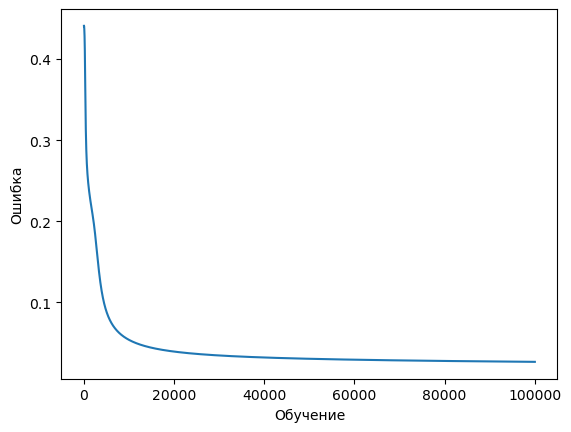

In [19]:
### 7 слоёв
### Шаг 3. Обученние нейронной сети
# присваивание случайных весов
w0 = 2*np.random.random((4, 7)) - 1 # для входного слоя   - 4 входа, 7 выходов
w1 = 2*np.random.random((7, 3)) - 1 # для внутреннего слоя - 7 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.01

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(np.dot(layer1, w1))
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(np.dot(layer0, w0))
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
    
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

print("Величина ошибки:")
print(errors[-1])

layer1 = sigmoid(np.dot(X_test, w0))
pred = sigmoid(np.dot(layer1, w1))
print()
print("Classification report:")
print()
print(classification_report(y_test.argmax(-1), pred.argmax(-1)))
print("Multilabel confusion matrix:")
print()
print(multilabel_confusion_matrix(y_test.argmax(-1), pred.argmax(-1)))

### Выводы:

**На точность представленной нейронной сети влияет:**
- количество внутренних слоев - недостаточное или наоборот избыточное количество слоёв увеличивает ошибку
- скорость обучения - неправильно подобранная скорость обучения не позволяет достичь лучшего результата

__*Комментарии преподавателя:*__<br>
*Юлия Пономарёва・Преподаватель<br>*

Добрый день!

1. Отлично написали про регуляризацию в деревьях
2. Здесь верно.